In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean(text):
    # Remove punctuation and digits
    translator = str.maketrans('', '', string.punctuation + string.digits)
    cleaned_text = text.translate(translator)
    return cleaned_text

In [ ]:
def tokenize(text):
    # Tokenize into words
    words = word_tokenize(text)
    return words

In [ ]:
def pos_tagging(tokens):
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    return pos_tags


In [ ]:
def remove_stopwords(tokens):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [ ]:
def stem_words(tokens):
    # Obtain stem words using Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

In [ ]:
def lemmatize_words(tokens, pos_tags):
    # Obtain lemmatized words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, pos in pos_tags:
        if pos.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif pos.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif pos.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif pos.startswith('RB'):  # Adverb
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            lemma = lemmatizer.lemmatize(word)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

In [ ]:
# Example
text = "I love this product, it's amazing!"
cleaned_text = clean(text)
tokens = tokenize(cleaned_text)
pos_tags = pos_tagging(tokens)
tokens_without_stopwords = remove_stopwords(tokens)
stemmed_tokens = stem_words(tokens_without_stopwords)
lemmatized_tokens = lemmatize_words(tokens_without_stopwords, pos_tags)

In [ ]:
print("Cleaned Text:", cleaned_text)
print("Tokens:", tokens)
print("POS Tags:", pos_tags)
print("Tokens without Stopwords:", tokens_without_stopwords)
print("Stemmed Tokens:", stemmed_tokens)
print("Lemmatized Tokens:", lemmatized_tokens)


Cleaned Text: I love this product its amazing
Tokens: ['I', 'love', 'this', 'product', 'its', 'amazing']
POS Tags: [('I', 'PRP'), ('love', 'VBP'), ('this', 'DT'), ('product', 'NN'), ('its', 'PRP$'), ('amazing', 'JJ')]
Tokens without Stopwords: ['love', 'product', 'amazing']
Stemmed Tokens: ['love', 'product', 'amaz']
Lemmatized Tokens: ['I', 'love', 'this', 'product', 'it', 'amazing']


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity

    # Classify the sentiment
    if sentiment_polarity > 0:
        sentiment = 'Positive'
    elif sentiment_polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_polarity

# Example
text = "I love this product, it's amazing!"
sentiment, polarity = analyze_sentiment(text)
print("Sentiment:", sentiment)
print("Polarity:", polarity)


Sentiment: Positive
Polarity: 0.625


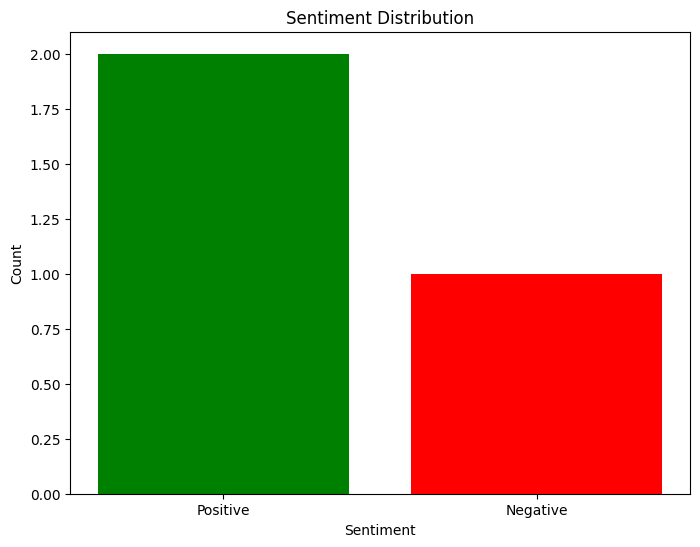

In [ ]:
import matplotlib.pyplot as plt

def plot_sentiment_distribution(sentiments):
    # Count the occurrences of each sentiment
    sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

    # Plot the sentiment distribution
    labels = list(sentiment_counts.keys())
    values = list(sentiment_counts.values())

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Distribution')
    plt.show()

# Example usage
texts = ["I love this product, it's amazing!", "This product is terrible.", "It's okay, not bad."]
sentiments = []
for text in texts:
    sentiment, _ = analyze_sentiment(text)
    sentiments.append(sentiment)

# Plot sentiment distribution
plot_sentiment_distribution(sentiments)


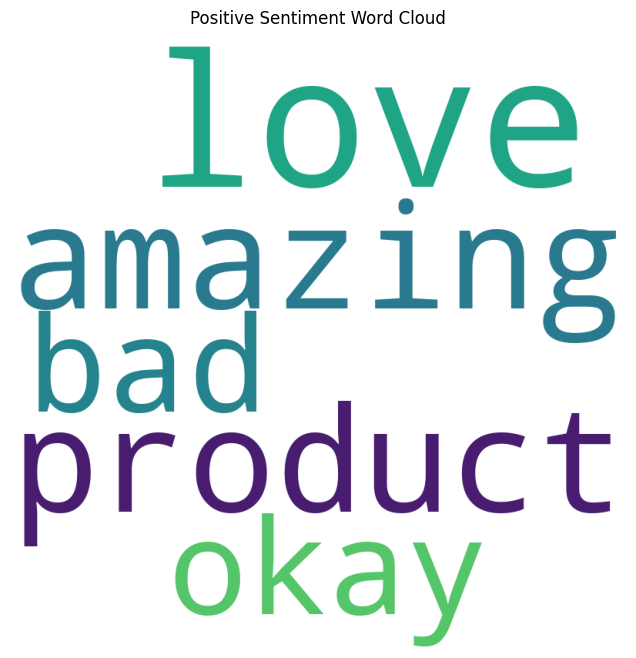

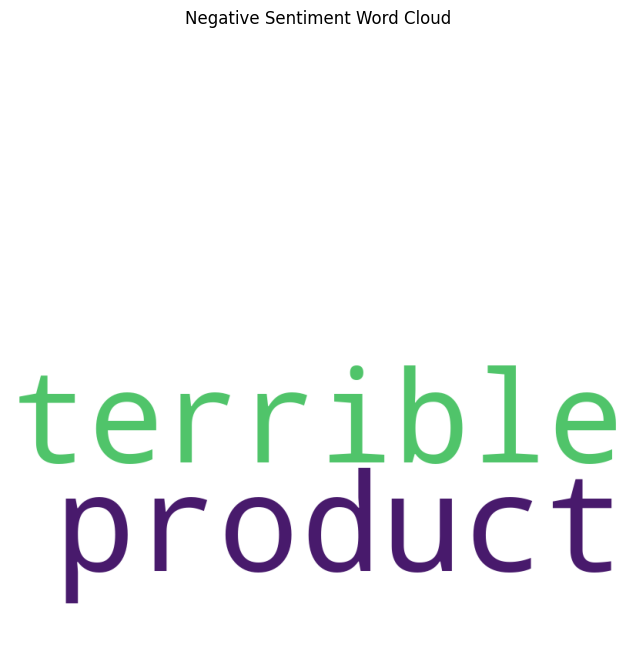

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(texts, sentiments):
    # Combine all text for each sentiment
    sentiment_text = {}
    for text, sentiment in zip(texts, sentiments):
        if sentiment not in sentiment_text:
            sentiment_text[sentiment] = text
        else:
            sentiment_text[sentiment] += ' ' + text

    # Generate word cloud for each sentiment
    for sentiment, text in sentiment_text.items():
        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(sentiment.capitalize() + ' Sentiment Word Cloud')
        plt.show()

# Example usage
texts = ["I love this product, it's amazing!", "This product is terrible.", "It's okay, not bad."]
sentiments = []
for text in texts:
    sentiment, _ = analyze_sentiment(text)
    sentiments.append(sentiment)

# Generate word cloud for sentiments
generate_wordcloud(texts, sentiments)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

def clean(text):
    # Remove punctuation and digits
    translator = str.maketrans('', '', string.punctuation + string.digits)
    cleaned_text = text.translate(translator)
    return cleaned_text

def tokenize(text):
    # Tokenize into words
    words = word_tokenize(text)
    return words

def pos_tagging(tokens):
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    return pos_tags

def remove_stopwords(tokens):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

def stem_words(tokens):
    # Obtain stem words using Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

def lemmatize_words(tokens, pos_tags):
    # Obtain lemmatized words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, pos in pos_tags:
        if pos.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif pos.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif pos.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif pos.startswith('RB'):  # Adverb
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            lemma = lemmatizer.lemmatize(word)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Example usage
text = "I am cleaning this text! It contains punctuation marks and numbers 12345."
cleaned_text = clean(text)
tokens = tokenize(cleaned_text)
pos_tags = pos_tagging(tokens)
tokens_without_stopwords = remove_stopwords(tokens)
stemmed_tokens = stem_words(tokens_without_stopwords)
lemmatized_tokens = lemmatize_words(tokens_without_stopwords, pos_tags)

print("Cleaned Text:", cleaned_text)
print("Tokens:", tokens)
print("POS Tags:", pos_tags)
print("Tokens without Stopwords:", tokens_without_stopwords)
print("Stemmed Tokens:", stemmed_tokens)
print("Lemmatized Tokens:", lemmatized_tokens)
